<a href="https://colab.research.google.com/github/yasuhiroinoue/AppMathSci/blob/main/%E5%BF%9C%E7%94%A8%E6%95%B0%E7%90%86(10_04).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

#**応用数理科学（第1回）**
成長と減衰
$$dy/dt=ky$$

#**人口動態**
人口予測は、社会基盤、福祉、環境などの様々な観点から重要である。人口動態の予測をするための数理モデルを考えよう。ただし、第1回の目的は、別にあり、人口動態の数理モデル構築を体験を通し、以下の数理モデリングの作法を知ることである。

1.   現象の観察（問題の認識）
2.   作業仮説の立案
3.   数式化（数理モデリング）
4.   数式を解く（多くの場合、シミュレーション）
5.   解の意味を考察
6.   数理モデルの検証（１と比較し、振る舞いを説明できなければ2に戻る）
7.   数理モデルを用いて、現象の説明、予測、意思決定、計画立案など


**人口データ**
googleで"人口 日本"と検索すると、容易にデータが手に入る。
以下のリンクから、人口統計のデータをcsv形式でエクスポートしよう。
[人口データ](https://datacommons.org/place/country/JPN?utm_medium=explore&mprop=count&popt=Person&hl=ja)

ダウロードしたら、第1行目の1列目=year, 2列目=populationと記載する。今後、軸用のラベルに使う。

In [27]:
#まず、データをながめる
df_info= pd.read_csv("data.csv")
df_info

,Entity DCID,Entity properties isoCode,Entity properties name,Variable DCID,Variable observation date,Variable observation metadata importName,Variable observation metadata provenanceUrl,Variable observation metadata scalingFactor,Variable observation metadata unit,Variable observation metadata unitDisplayName,Variable observation value,Variable properties name
0,country/JPN,JP,Japan,Count_Person,1960,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,NaN,NaN,93216000,Total Population
1,country/JPN,JP,Japan,Count_Person,1961,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,NaN,NaN,94055000,Total Population
2,country/JPN,JP,Japan,Count_Person,1962,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,NaN,NaN,94933000,Total Population
3,country/JPN,JP,Japan,Count_Person,1963,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,NaN,NaN,95900000,Total Population
4,country/JPN,JP,Japan,Count_Person,1964,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,NaN,NaN,96903000,Total Population
...,...,...,...,...,...,...,...,...,...,...,...,...
58,country/JPN,JP,Japan,Count_Person,2018,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,NaN,NaN,126811000,Total Population
59,country/JPN,JP,Japan,Count_Person,2019,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,NaN,NaN,126633000,Total Population
60,country/JPN,JP,Japan,Count_Person,2020,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,NaN,NaN,126261000,Total Population
61,country/JPN,JP,Japan,Count_Person,2021,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,NaN,NaN,125681593,Total Population


In [28]:
# Rename the columns
df_new = df_info.rename(columns={"Variable observation date": "year", "Variable observation value": "population"})

# Select only the year and population columns
df_new = df_new[["year", "population"]]

# Print the new dataframe
df_new



,year,population
0,1960,93216000
1,1961,94055000
2,1962,94933000
3,1963,95900000
4,1964,96903000
...,...,...
58,2018,126811000
59,2019,126633000
60,2020,126261000
61,2021,125681593


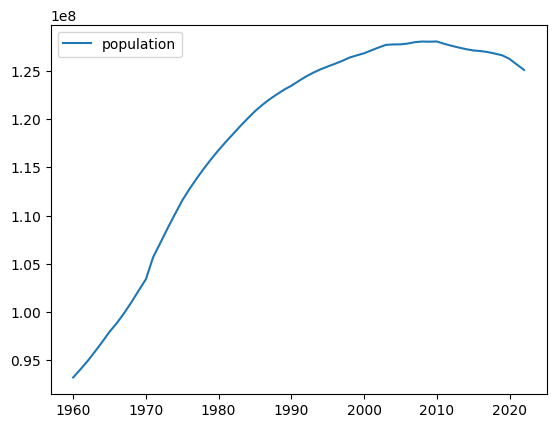

In [29]:
plt.plot(df_new["year"],df_new["population"],label="population")
plt.legend()

いま、人口の変化は、人が生まれること、死ぬことにのみ依存するとする。
時刻$t$の人口$N(t)$とすると、生まれた人数$=\alpha N \Delta t$、亡くなった人数$=\beta N \Delta t$
である。なぜなら、$0$から人は生まれないし、死亡するのは今生きている人に限られるため。
したがって、時間区間$\Delta t$における正味の人口変化$\Delta N=N(t+\Delta t) - N(t)$は
$$\Delta N = \alpha N \Delta t - \beta N \Delta t$$
$$=(\alpha - \beta)N\Delta t = \gamma N \Delta t$$
したがって、
$$\frac{\Delta N}{\Delta t}=\gamma N$$
$\Delta t\rightarrow 0$
$$\frac{dN}{dt} = \gamma N$$

この式は、簡単に解くことができ、$N(t_0)=N_0$ at time $t=t_0$とすると
$$N(t)=N_0 \exp(\gamma (t-t_0))$$
人口動態は、モデル定数$\gamma$の符号に依存する。
$\gamma > 0$なら人口は増加（指数関数）、$\gamma = 0 $なら変化なし、$\gamma < 0$なら人口は減少することを示す。

具体的に解の意味を考察しよう。人口データの最初の年$t=1960$年に、$N(1960)=92500572$、次の年$t=1961$年においては、$N(1961)=94943000$であった。ここから、
$$\frac{N(1961)}{N(1960)}=\frac{94943000}{92500572}=\exp(\gamma)$$
が得られる。
両辺対数を取ることにより、$\gamma = 0.0260618832454646$となる。（下記の式を実行して、確かめてください）

In [30]:
g = math.log(94055000/93216000)
print(g)

0.008960336767959902


では、この予測式を使って、人口動態の予測結果と実際の人口変化を比較しよう

In [31]:
num=2022-1960+1
p=np.zeros(num)
p[0]=93216000
for t in range(1,num):
  p[t]=p[0]*math.exp(g*t)

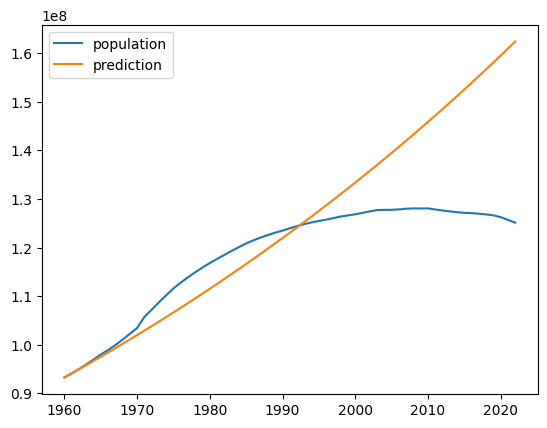

In [32]:
plt.plot(df_new["year"],df_new["population"],label="population")
plt.plot(df_new["year"],p,label="prediction")
plt.legend()

予測値は、徐々に実際と乖離し、1967年に誤差10％を超えている。何がいけなかったのだろうか？
ここでは、初期の1年間から$\gamma$を求めたのが原因と考え、1965年との差から$\gamma$を求めなおそう

In [33]:
g = math.log(97952000/93216000)/5
print(g)

0.00991163639719559


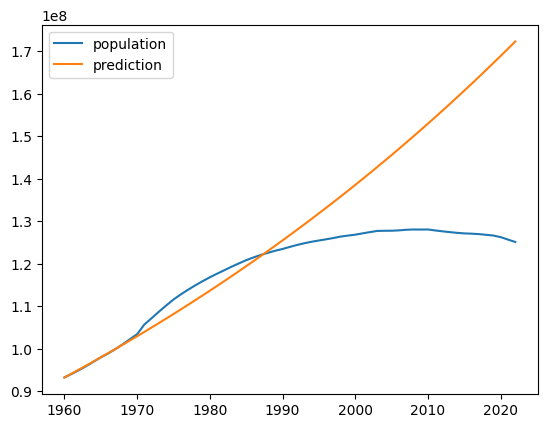

In [34]:
num=2022-1960+1
p=np.zeros(num)
p[0]=93216000
for t in range(1,num):
  p[t]=p[0]*math.exp(g*t)

plt.plot(df_new["year"],df_new["population"],label="population")
plt.plot(df_new["year"],p,label="prediction")
plt.legend()

予測精度が上がったことが分かるだろう。10％の誤差を超えるのは、1995年頃となっている。


##**数理モデルの変更**
$\gamma$の値の決定において、1年分、5年分のデータを用い、予測制度が変わることから、10年分、20年分を用いれば、さらに精度が上がるだろうか？
1990年以降の実際の人口動態を観察すると、徐々に人口増加率が減少している。これは指数関数的な増加には見られないことから、数理モデルが捉えられていない現象が人工動態に隠されていると考えられる。

**人口増加の抑制効果（過密効果／環境収容力）**
人口増加に伴い、社会基盤や土地、就労機会など、資源配分を巡る競争が直接・間接的に増加すると考えられる。そこで、生活する環境には、このような“資源”に限りがあり、その資源に対する人口上限があると考えよう。

これを次のようにモデル化する。
資源競争のない状況での人口増加率を$\gamma > 0$とする。人口上限$N_\infty$に対しての余力が人口増加係数を決め、それを$\gamma (1-\frac{N}{N_\infty})$と表す。
人口動態を表す式は、先の微分方程式において、$\gamma\rightarrow\gamma (1-\frac{N}{N_\infty})$と変更した以下の式であらわされる
$$\frac{dN}{dt} = \gamma (1-\frac{N}{N_\infty})N$$
この式は、簡単に解くことができ、解は次式となる。
$$N(t)=\frac{N_\infty}{1+(N_\infty/N_0-1)\exp(-\gamma (t-t_0))}$$

$N_\infty=130528280$、$\gamma=0.0609505$として予測式と人口動態の比較をグラフに示す。

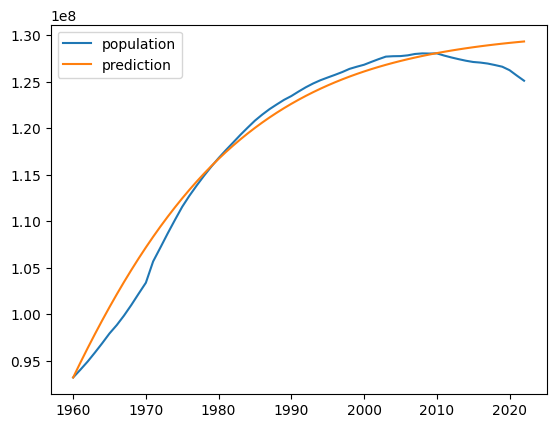

In [46]:
N_inf = 130528280
g=0.0609505
p[0]=93216000
for t in range(1,num):
  p[t]=N_inf/(1+(N_inf/p[0]-1)*math.exp(-g*t))
plt.plot(df_new["year"],df_new["population"],label="population")
plt.plot(df_new["year"],p,label="prediction")
plt.legend()

このように、人口増加による人口増加率の抑制効果を取り入れると、より現実のデータが示す性質を表現できる。

しかしながら、これをもって「資源配分の競争が人工増加を抑える」と結論できるわけではなく、現時点では、あくまで、予測式が使い物になりそうだ、ということだけがいえる。メカニズムとして立証するには、資源配分の競争を変化させるような社会実験を計画し($N_\infty$を変える)、実施前に予測をしておいて、社会実験後の結果を評価することで、初めて判断が可能になる。そして、さらに大事なことであるが、この数理モデルは、$N_\infty$がどのように決まるのかについては何も答えをださない。それには別のモデルが必要になる。